# KDTree example

This notebook reproduces the code presented in [`scipy-cookbook`](https://scipy-cookbook.readthedocs.io/items/KDTree_example.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kdtree( data, leafsize=10 ):
    """
    build a kd-tree for O(n log n) nearest neighbour search

    input:
        data:       2D ndarray, shape =(ndim,ndata), preferentially C order
        leafsize:   max. number of data points to leave in a leaf

    output:
        kd-tree:    list of tuples
    """

    ndim = data.shape[0]
    ndata = data.shape[1]

    # find bounding hyper-rectangle
    hrect = np.zeros((2,data.shape[0]))
    hrect[0,:] = data.min(axis=1)
    hrect[1,:] = data.max(axis=1)

    # create root of kd-tree
    idx = np.argsort(data[0,:], kind='mergesort')
    data[:,:] = data[:,idx]
    splitval = data[0,ndata//2]

    left_hrect = hrect.copy()
    right_hrect = hrect.copy()
    left_hrect[1, 0] = splitval
    right_hrect[0, 0] = splitval

    tree = [(None, None, left_hrect, right_hrect, None, None)]

    stack = [(data[:,:ndata//2], idx[:ndata//2], 1, 0, True),
             (data[:,ndata//2:], idx[ndata//2:], 1, 0, False)]

    # recursively split data in halves using hyper-rectangles:
    while stack:

        # pop data off stack
        data, didx, depth, parent, leftbranch = stack.pop()
        ndata = data.shape[1]
        nodeptr = len(tree)

        # update parent node

        _didx, _data, _left_hrect, _right_hrect, left, right = tree[parent]

        tree[parent] = (_didx, _data, _left_hrect, _right_hrect, nodeptr, right) if leftbranch \
            else (_didx, _data, _left_hrect, _right_hrect, left, nodeptr)

        # insert node in kd-tree

        # leaf node?
        if ndata <= leafsize:
            _didx = didx.copy()
            _data = data.copy()
            leaf = (_didx, _data, None, None, 0, 0)
            tree.append(leaf)

        # not a leaf, split the data in two      
        else:
            splitdim = depth % ndim
            idx = np.argsort(data[splitdim,:], kind='mergesort')
            data[:,:] = data[:,idx]
            didx = didx[idx]
            nodeptr = len(tree)
            stack.append((data[:,:ndata//2], didx[:ndata//2], depth+1, nodeptr, True))
            stack.append((data[:,ndata//2:], didx[ndata//2:], depth+1, nodeptr, False))
            splitval = data[splitdim,ndata//2]
            if leftbranch:
                left_hrect = _left_hrect.copy()
                right_hrect = _left_hrect.copy()
            else:
                left_hrect = _right_hrect.copy()
                right_hrect = _right_hrect.copy()
            left_hrect[1, splitdim] = splitval
            right_hrect[0, splitdim] = splitval
            # append node to tree
            tree.append((None, None, left_hrect, right_hrect, None, None))

    return tree

In [3]:
N = 10
data = np.random.rand(2, N)

In [4]:
data.shape

(2, 10)

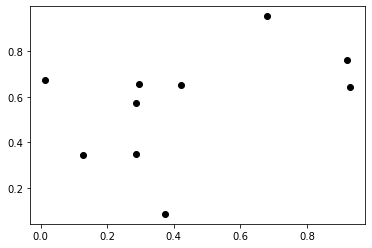

In [5]:
plt.figure()
plt.plot(data[0], data[1], 'ko')
plt.show()

In [6]:
complete_tree = kdtree(data, leafsize=10)

In [7]:
complete_tree

[(None,
  None,
  array([[0.01416608, 0.08605675],
         [0.37250221, 0.95465068]]),
  array([[0.37250221, 0.08605675],
         [0.9288732 , 0.95465068]]),
  2,
  1),
 (array([4, 5, 8, 6, 1]),
  array([[0.37250221, 0.42177526, 0.67869947, 0.92190128, 0.9288732 ],
         [0.08605675, 0.65331554, 0.95465068, 0.76310125, 0.64373936]]),
  None,
  None,
  0,
  0),
 (array([7, 9, 3, 0, 2]),
  array([[0.01416608, 0.12645906, 0.28545245, 0.28718442, 0.29491963],
         [0.67550002, 0.34656121, 0.34901522, 0.57483367, 0.6556452 ]]),
  None,
  None,
  0,
  0)]

In [8]:
len(complete_tree)

3

In [ ]:
# get data dimension and number of elements
ndim = data.shape[0]
ndata = data.shape[1]

In [ ]:
ndim, ndata

In [ ]:
# find bounding hyper-rectangle
hrect = np.zeros((ndim,ndim))

In [ ]:
# minima x (data[0]) and y (data[1]) values 
hrect[0,:] = data.min(axis=1)

# maxima x (data[0]) and y (data[1]) values 
hrect[1,:] = data.max(axis=1)

In [ ]:
hrect

In [ ]:
# create root of kd-tree

# sort data along x-axis
idx = np.argsort(data[0,:])

# rearrange data 
data[:,:] = data[:,idx]

# define the x value at the central position of the sorted data
splitval = data[0,ndata//2]

In [ ]:
data

In [ ]:
splitval

In [ ]:
# create copies of the hrect
left_hrect = hrect.copy()
right_hrect = hrect.copy()

In [ ]:
# replace maximum x by splitval in left_hrect
left_hrect[1, 0] = splitval

# replace minimum x by splitval in right_hrect
right_hrect[0, 0] = splitval

In [ ]:
left_hrect

In [ ]:
right_hrect

In [ ]:
# define the tree as list containing a single tuple
# actually, I didn't get it
tree = [(None, None, left_hrect, right_hrect, None, None)]

In [ ]:
tree

In [ ]:
# define stack as a list containing two tuples
# the first contains the first half of ordered data, its indices and 
# three values that I didn't understand
# the second tuples is similar to the first one
stack = [(data[:,:ndata//2], idx[:ndata//2], 1, 0, True),
         (data[:,ndata//2:], idx[ndata//2:], 1, 0, False)]

In [ ]:
stack

In [ ]:
len(tree)

In [ ]:
# pop last tuple off stack
# this tuple contains the data after splitval
data, didx, depth, parent, leftbranch = stack.pop()

# number of data in the selected tuple
ndata = data.shape[1]

# number of tuples in tree
nodeptr = len(tree)

In [ ]:
data, didx, depth, parent, leftbranch

In [ ]:
ndata

In [ ]:
nodeptr

In [ ]:
# update parent node

_didx, _data, _left_hrect, _right_hrect, left, right = tree[parent]

In [ ]:
_didx, _data, _left_hrect, _right_hrect, left, right

In [ ]:
#  if leftbranch \
#     else (_didx, _data, _left_hrect, _right_hrect, left, nodeptr)

(_didx, _data, _left_hrect, _right_hrect, nodeptr, right) if leftbranch \
     else (_didx, _data, _left_hrect, _right_hrect, left, nodeptr)

In [ ]:
if leftbranch:
    tree[parent] = (_didx, _data, _left_hrect, _right_hrect, nodeptr, right)
else:
    tree[parent] = (_didx, _data, _left_hrect, _right_hrect, left, nodeptr)

In [ ]:
tree[parent]